In [1]:
import auction_data, os, analytics
hist_plot = auction_data.hist_plot
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cvxpy
sns.set_style('white')
%matplotlib inline

In [2]:
tsuchiura_data = auction_data.AuctionData('tests/reference_data/tsuchiura_data.csv')

In [3]:
deviations = [-.02, -.0001, .0, .0005]
demands = [tsuchiura_data.get_counterfactual_demand(rho) for rho in deviations]
print(demands)

[0.6938393464942137, 0.25238257317903334, 0.25017018379850237, 0.24727705922396187]


In [4]:
constraints = [analytics.MarkupConstraint(max_markup=.5),
               analytics.InformationConstraint(k=.5, sample_demands=demands)]

In [5]:
installed_solvers = cvxpy.installed_solvers()
print(installed_solvers)
solvers = ['ECOS'] #, 'CVXOPT']
print(solvers)

['ECOS', 'ECOS_BB', 'CVXOPT', 'GLPK', 'GLPK_MI', 'SCS', 'OSQP']
['ECOS']


   Seed 0, result 0.4057023623540873
   Seed 1, result 0.21774334034236664
   Seed 2, result 0.10695174144966697
   Seed 3, result 0.04180435395672499
   Seed 4, result -2.4286486386485606e-11
   Seed 5, result -1.4187858815169954e-11
   Seed 6, result -4.6462576019085135e-12
   Seed 7, result -2.1460020440831782e-12
   Seed 8, result -1.7072104563820405e-12
   Seed 9, result -1.136606717347113e-10


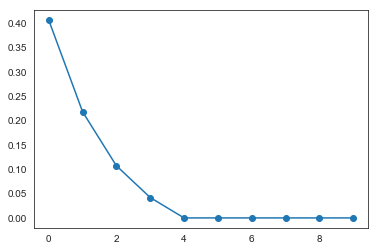

[0.4057023623540873, 0.21774334034236664, 0.10695174144966697, 0.04180435395672499, -2.4286486386485606e-11, -1.4187858815169954e-11, -4.6462576019085135e-12, -2.1460020440831782e-12, -1.7072104563820405e-12, -1.136606717347113e-10]


In [7]:
seeded_points = np.array([])
number_iterations = 10
first_seed = 0
threshold = 0.005

for project in [True]:
    num_points = 1e6 * (1 - project) + 1e4 * project
    
    try:
        min_collusion_solver = analytics.MinCollusionIterativeSolver(
                data=tsuchiura_data,
                deviations=deviations,
                tolerance=2 * 1./tsuchiura_data.df_bids.shape[0],
                metric=analytics.IsNonCompetitive,
                plausibility_constraints=constraints,
                num_points=num_points,
                first_seed=first_seed,
                project=project,
                number_iterations=number_iterations,
                solution_threshold=0.005)
        
        print(min_collusion_solver.solution)

    except Exception as e:
        print('Solver error: {}'.format(e))
        

    